In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from keras import models, layers

from keraspp import skeras

In [2]:
def rnn_model(shape):
    m_x = layers.Input(shape=shape)
    m_h = layers.LSTM(10)(m_x)
    m_y = layers.Dense(1)(m_h)
    m = models.Model(m_x,m_y)
    
    m.compile(optimizer='adam',loss='mean_squared_error')
    m.summary()
    return m

class Dataset:
    def __init__(self, fname='international-airline-passengers.csv', D=12):
        data_dn = load_data(fname=fname)
        X, y = get_Xy(data_dn, D=D)
        X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2, random_state=42)
        
        self.X, self.y = X,y
        self.X_train, self.X_test, self.y_train, self.y_test = X_train, X_test, y_train, y_test

def load_data(fname='international-airline-passengers.csv'):
    dataset = pd.read_csv(fname, usecols=[1], engine='python', skipfooter=3)
    data = dataset.values.reshape(-1)
    plt.plot(data)
    plt.xlabel('Time'); plt.ylabel('#Passengers')
    plt.title('Original Data')
    plt.show()
    
    # data normalize
    data_dn = (data-np.mean(data)) / np.std(data) / 5
    plt.plot(data_dn)
    plt.xlabel('Time'); plt.ylabel('Normalized #Passengers')
    plt.title('Normalized data by $E[]$ $5\sigma$')
    plt.show()
    
    return data_dn

def get_Xy(data, D=12):
    X_l = []
    y_l = []
    N = len(data)
    assert N > D, "N should be larger than D, where N is len(data)"
    for i in range(N-D-1):
        X_l.append(data[i:i+D])
        y_l.append(data[i+D])

    X = np.array(X_l)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    y = np.array(y_l)
    print(X.shape, y.shape)
    return X,y

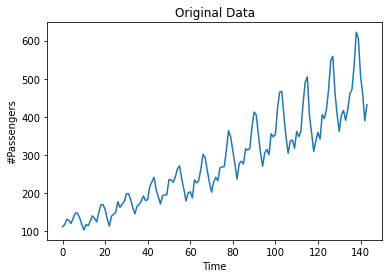

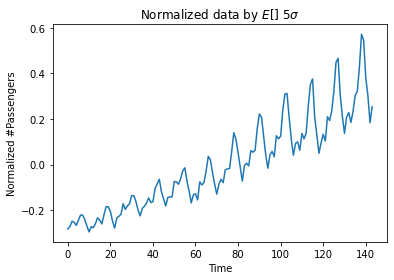

(131, 12, 1) (131,)
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [3]:
data = Dataset()
shape = data.X.shape[1:]
model = rnn_model(shape)
epochs = 400

In [4]:
X_train, X_test = data.X_train, data.X_test
y_train, y_test = data.y_train, data.y_test
h = model.fit(data.X_train, data.y_train, epochs=epochs, validation_data=[X_test, y_test], verbose=0)

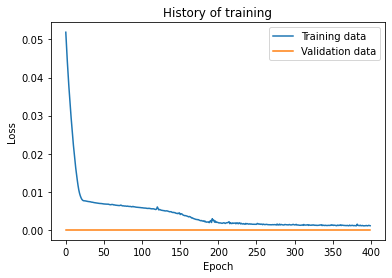

In [5]:
skeras.plot_loss(h)
plt.title('History of training')
plt.show()

1/1 [==============================] - 0s 1000us/step - loss: 0.0011
Loss :  0.001147396513260901


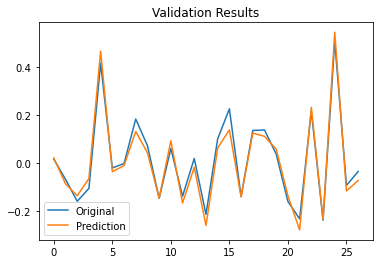

In [6]:
yp = model.predict(X_test)
print('Loss : ', model.evaluate(X_test,y_test))
plt.plot(yp, label='Original')
plt.plot(y_test, label='Prediction')
plt.legend(loc=0)
plt.title('Validation Results')
plt.show()

In [7]:
yp = model.predict(X_test).reshape(-1)
print('Loss : ', model.evaluate(X_test, y_test))
print(yp.shape, y_test.shape)

1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Loss :  0.001147396513260901
(27,) (27,)


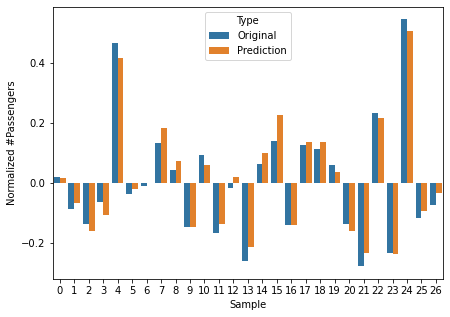

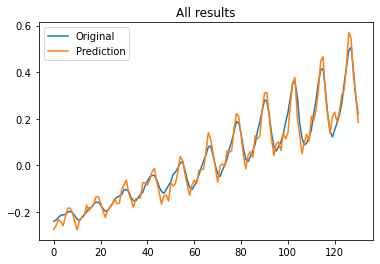

In [8]:
df = pd.DataFrame()
df['Sample'] = list(range(len(y_test))) * 2
df['Normalized #Passengers'] = np.concatenate([y_test,yp], axis=0)
df['Type'] = ['Original'] * len(y_test) + ['Prediction'] * len(yp)

plt.figure(figsize=(7,5))
sns.barplot(x='Sample', y='Normalized #Passengers', hue='Type', data=df)
plt.ylabel('Normalized #Passengers')
plt.show()

yp = model.predict(data.X)
plt.plot(yp, label='Original')
plt.plot(data.y, label='Prediction')
plt.legend(loc=0)
plt.title('All results')
plt.show()